In [78]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from help_functions import *

import warnings
warnings.filterwarnings('ignore')

In [88]:
path='sub_1.txt'
to_test = np.loadtxt(path)
type_=2

In [89]:
import re

In [90]:
actual =re.findall('sub_\w',path)
actual[0]

'sub_1'

In [91]:
test=preprocessing(to_test,type_)

In [92]:
test=np.array(test)
test.shape

(1, 8)

In [93]:
test

array([[-3.24773726e-01,  7.68115830e-01,  6.00000000e+02,
         0.00000000e+00,  2.25735663e+00,  7.40000000e+01,
        -3.35757689e-01,  8.00000000e+00]])

In [94]:
if type_==1:
    loaded_model=pickle.load(open('LDA_classifier_wavelet.pkl','rb'))
# fiducial 
elif type_==2:
    loaded_model=pickle.load(open('LDA_classifier_fiducial.pkl','rb'))
else:
    loaded_model=pickle.load(open('LDA_classifier_ACDCT.pkl','rb'))

In [95]:
def prep_type(type_):
    if type_==1:
        return 'wavelet'
    elif type_==2:
        return 'fiducial_features'
    else:
        return 'AC/DCT'
# type_=1:use wavelet
# type_=2:use fiducial_features
# type_=3:use AC/DCT

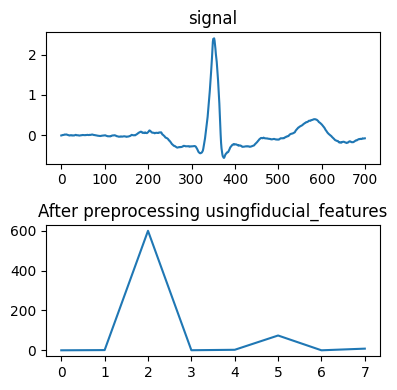

In [96]:
plt.figure(figsize=(4,4))
plt.subplot(2,1,1)
plt.title('signal',fontdict={'fontsize':12})
plt.plot(to_test)

plt.subplot(2,1,2)

if type_==2:
    plt.title(f'After preprocessing using{prep_type(type_)}',fontdict={'fontsize':12})
    plt.plot(test[0])

else:
    
    plt.title(f'After preprocessing using{prep_type(type_)}',fontdict={'fontsize':12})
    plt.plot(test)
plt.tight_layout()

In [97]:
if type_ !=2:
    test=np.expand_dims(test,axis=0)
print('test shape after ',test.shape)
test.shape

test shape after  (1, 8)


(1, 8)

In [98]:
pred=loaded_model.predict(test)

pred[0]

0

In [99]:
def get_sub(idx):
    return f'sub_{idx+1}'

In [100]:
if actual[0] == get_sub(pred[0]):
    print('Identity verified --> Accessed successfully')
else:
    print('Identity not verified --> Access Denied')

Identity verified --> Accessed successfully
